<a href="https://colab.research.google.com/github/narayansharma275/visualization/blob/main/PlotlyBook2Narayan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Here, we shall be working on World University Rankings Data and Performing EDA using Plotly!

### Imports

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import cufflinks as cf 
import plotly.express as px
%matplotlib inline


from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = 'colab'

### Sanity Checks to See if the Imports are Working

In [ ]:
arr_test = np.random.rand(20,5)
df_test = pd.DataFrame(arr_test, columns = ['A','B','C','D','E'])
df_test['target'] = np.linspace(1,20,20)
df_test.head()

,A,B,C,D,E,target
0,0.269359,0.886331,0.488022,0.162117,0.372412,1.0
1,0.752582,0.396762,0.121012,0.806126,0.258457,2.0
2,0.522797,0.434047,0.743349,0.730712,0.812194,3.0
3,0.348052,0.997324,0.139443,0.484034,0.383150,4.0
4,0.554087,0.152378,0.743101,0.999519,0.178417,5.0


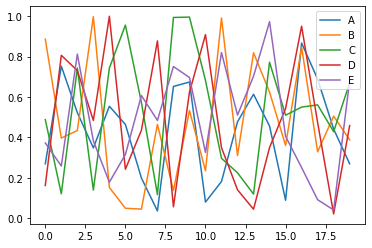

In [ ]:
df_test[df_test.columns[:-1]].plot()

In [125]:
fig = px.line(df_test,df_test["A"], df_test['target'])
fig.show()

### What all shall I be doing in this notebook: 

<br>Content:
1. [Loading Data and Explanation of Features](#1)
1. [Line Charts](#2)
1. [Scatter Charts](#3)
1. [Bar Charts](#4)
1. [Pie Charts](#5)
1. [Bubble Charts](#6)
1. [Histogram](#7)
1. [Word Cloud](#8)
1. [Box Plot](#9)
1. [Scatter Plot Matrix](#10)
1. Map Plots: https://www.kaggle.com/kanncaa1/time-series-prediction-with-eda-of-world-war-2
1. Data Visualization
    1. Seaborn: https://www.kaggle.com/kanncaa1/seaborn-for-beginners
    1. Bokeh 1: https://www.kaggle.com/kanncaa1/interactive-bokeh-tutorial-part-1
    1. Bokeh 2: https://www.kaggle.com/kanncaa1/interactive-bokeh-tutorial-part-
    1. Rare Visualization: https://www.kaggle.com/kanncaa1/rare-visualization-tools
1. [Inset Plots](#11)
1. [3D Scatter Plot with Colorscaling](#12)
1. [Multiple Subplots](#13)
1. Earthquake Animation: https://www.kaggle.com/kanncaa1/earthquake-animation-with-plotly

## Loading Data and Explanation of Features

We will be working on Times Data, one of the 6 datasets in WUR data which we will download from Kaggle using Open Datasets library

In [ ]:
# !pip install opendatasets --upgrade --quiet
import opendatasets as od

dataset_url = 'https://www.kaggle.com/mylesoneill/world-university-rankings'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: narayansharma275
Your Kaggle Key: ··········


100%|██████████| 1.41M/1.41M [00:00<00:00, 105MB/s]

In [ ]:
import os
data_dir = './world-university-rankings'
print(os.listdir(data_dir))

['shanghaiData.csv', 'educational_attainment_supplementary_data.csv', 'timesData.csv', 'cwurData.csv', 'school_and_country_table.csv', 'education_expenditure_supplementary_data.csv']


In [ ]:
timesData = pd.read_csv(data_dir+'/timesData.csv')
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [ ]:
timesData.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


### Line Charts

In [ ]:
#dataframe with 100 values
df = timesData.iloc[:100,:]
df.info()

trace1= go.Scatter(x=df.world_rank, 
                   y= df.citations,
                   mode='lines',
                   name='citations',
                  #  marker= dict(color='rgba(16,112,2,0.8)'),
                   text= df.university_name)

trace2 = go.Scatter(
                    x = df.world_rank,
                    y = df.teaching,
                    mode = "lines+markers",
                    name = "teaching",
                    # marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text= df.university_name)

data = [trace1, trace2]
layout = dict(title = "Citation & Teaching vis-a-vis World Rank of Top 100 Universities",
              xaxis= dict(title="World Rank", ticklen=5, zeroline=False)
              )
fig = go.Figure(data,layout)
fig.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              100 non-null    object 
 1   university_name         100 non-null    object 
 2   country                 100 non-null    object 
 3   teaching                100 non-null    float64
 4   international           100 non-null    object 
 5   research                100 non-null    float64
 6   citations               100 non-null    float64
 7   income                  100 non-null    object 
 8   total_score             100 non-null    object 
 9   num_students            97 non-null     object 
 10  student_staff_ratio     97 non-null     float64
 11  international_students  97 non-null     object 
 12  female_male_ratio       85 non-null     object 
 13  year                    100 non-null    int64  
dtypes: float64(4), int64(1), object(9)
memory u

### Scatter Charts

In [ ]:
#Citation vs world rank of top 100 universities with only 2014, 2015 and 2016 as years
df2014 = timesData[timesData.year==2014].iloc[:100,:]
df2015 = timesData[timesData.year==2015].iloc[:100,:]
df2016 = timesData[timesData.year==2016].iloc[:100,:]

trace1= go.Scatter(x=df2014.world_rank,
                   y= df2014.citations,
                   mode="markers",
                   name="2014",
                   text= df2014.university_name)
trace2= go.Scatter(x=df2015.world_rank,
                   y= df2015.citations,
                   mode="markers",
                   name="2015",
                   text= df2015.university_name)
trace3= go.Scatter(x=df2016.world_rank,
                   y= df2016.citations,
                   mode="markers",
                   name="2016",
                   text= df2016.university_name)

data = [trace1, trace2, trace3]

layout = dict(title='Citation v/s Ranking against 2014,15 & 16',
              xaxis= dict(title='World Rank', ticklen = 5, zeroline= False),
              yaxis= dict(title='Citation', ticklen = 5, zeroline= False)
              )
fig = go.Figure(data, layout)
fig.show()

### Bar Charts

In [ ]:
#Citations and teaching of Top 5 Universities in 2016

df2016= df2016.iloc[:5,:]
df2016

trace1= go.Bar(x=df2016.university_name,
               y= df2016.teaching,
               name='teaching',
               text=df2016.country)
trace2= go.Bar(x=df2016.university_name,
               y= df2016.citations,
               name='citations',
               text=df2016.country)

data= [trace1, trace2]

# layout = go.Layout(barmode='group')
layout = dict(title='Citations and Teaching ',
              xaxis=dict(title="Top 5 Universities"),
              barmode='relative')
fig = go.Figure(data,layout)
fig.show()


In [ ]:
#Citation vs income for universities 

from plotly import tools

df2016= timesData[timesData.year==2016].iloc[:10,:]

y_saving = [each for each in df2016.research]
y_networth =[float(each) for each in df2016.income]
x_saving = [each for each in df2016.university_name]
x_networth= [each for each in df2016.university_name]

trace0 = go.Bar(x=y_saving,
                y=x_saving,
                name="research",
                orientation="h")
trace1 = go.Scatter(
                x=y_networth,
                y=x_networth,
                mode='lines+markers',
                name='income',
)

layout = dict(title="Citations and Income",
              yaxis=dict(showticklabels=True),
              yaxis2=dict(showline=True,showticklabels=False,linewidth=2),
              xaxis=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True),
              xaxis2=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,side='top',dtick=25),
              legend=dict(x=0.029,y=1.038,font=dict(size=10) ),
              margin=dict(l=200, r=20,t=70,b=70)
)

annotations = []
y_s = np.round(y_saving, decimals=2)
y_nw = np.rint(y_networth)

#  Adding labels
# for ydn, yd, xd in zip(y_nw, y_s, x_saving):
#     # labeling the scatter savings
#     annotations.append(dict(xref='x2', yref='y2', y=xd, x=ydn - 4,text='{:,}'.format(ydn),font=dict(family='Arial', size=12,color='rgb(63, 72, 204)'),showarrow=False))
#     # labeling the bar net worth
#     annotations.append(dict(xref='x1', yref='y1', y=xd, x=yd + 3,text=str(yd),font=dict(family='Arial', size=12,color='rgb(171, 50, 96)'),showarrow=False))

# layout['annotations'] = annotations

#Creating 2 subplots
fig = tools.make_subplots(rows=1, cols=2, specs= [[{},{}]],
                          shared_xaxes= True,
                          shared_yaxes= False,
                          vertical_spacing= 0.01)

fig.append_trace(trace0,1,1)
fig.append_trace(trace1,1,2)

fig.layout.update(layout)
fig.show()


/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



### Pie Charts

In [126]:
#Geographic Distribution of Top 100 universities in 2016
from collections import Counter
df2016= timesData[timesData.year==2016][:100]
pie1= Counter(df2016.country).values()
labels = Counter(df2016.country).keys()

fig = px.pie(values=list(pie1),
             labels=list(labels),
             title="Geographic Dist of Universities",
             color_discrete_sequence= px.colors.sequential.Plasma,
             names=list(labels)
             )

fig.update_layout(width=800,
                  height=800)
fig.update_traces(hoverinfo="label+percent",
                  textinfo= 'label+percent')
fig.show()             

### Bubble Charts

In [130]:
#Top 10 Universities vs Teaching Score (with No. of Students and Innternational Score) in 2015

df2015= timesData[timesData.year==2015].iloc[:10,:]
num_students_size= [float(each.replace(',','.')) for each in df2015.num_students]
international_color= [float(each) for each in df2015.international]


data = [dict(x=df2015.world_rank,
             y=df2015.teaching,
             mode='markers',
             marker= dict(color=international_color,
                          size=num_students_size,
                          showscale=True),
             text=df2015.university_name)]
layout = dict(title='Ranking vs Teaching [With Student Size & Int Score -2015]',
              xaxis= dict(title='World Rank', ticklen = 5, zeroline= False),
              yaxis= dict(title='Teaching', ticklen = 5, zeroline= False)
              )
fig= go.Figure(data, layout)  
fig.show()           

### Histogram

In [138]:
#Student to Staff Ration in 2010,15
x2014= timesData.student_staff_ratio[timesData.year == 2014]
x2016 = timesData.student_staff_ratio[timesData.year == 2016]

trace1 = go.Histogram(
    x=x2014,
    opacity=0.75,
    name = "2014",
    marker=dict(color='rgba(171, 50, 96, 0.6)'))
trace2 = go.Histogram(
    x=x2016,
    opacity=0.75,
    name = "2016",
    marker=dict(color='rgba(12, 50, 196, 0.6)'))

data = [trace1, trace2]
layout = go.Layout(barmode='overlay',
                   title=' students-staff ratio in 2014 and 2016',
                   xaxis=dict(title='students-staff ratio'),
                   yaxis=dict( title='Count'),
)
fig = go.Figure(data=data, layout=layout)
fig.show()

### Word Cloud


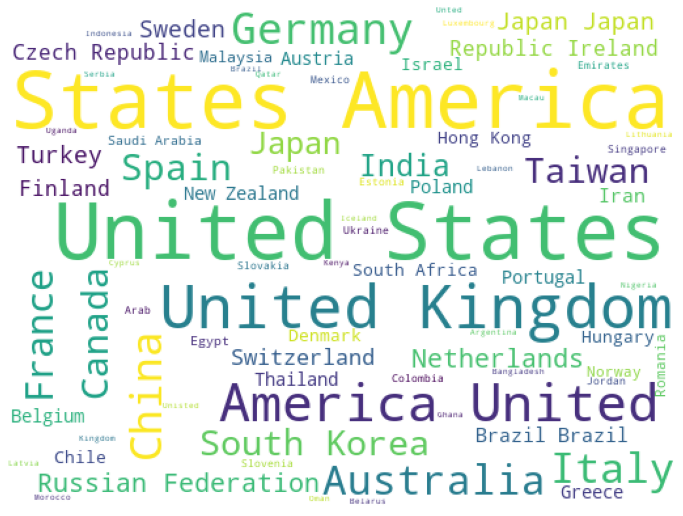

In [146]:
# data prepararion
import matplotlib.pyplot as plt
from wordcloud import WordCloud
df2016 = timesData.country[timesData.year == 2016]
plt.subplots(figsize=(12,12))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(df2016))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

In [142]:
pip install wordcloud

### Box Plots 

In [147]:
#Research vs Teaching of universities 

trace0= go.Box(
    y=timesData.teaching,
    name='teaching score of Universities (All time)',
)

trace1= go.Box(
    y=timesData.research,
    name="research score of Universities (All time)"
)

data= [trace0, trace1]
fig = go.Figure(data)
fig.show()

### Scatter Plots

In [148]:
import plotly.figure_factory as ff

In [152]:

dataframe = timesData[timesData.year == 2015]
data2015 = dataframe.loc[:,["research","international", "total_score"]]
data2015["index"] = np.arange(1,len(data2015)+1)


fig = ff.create_scatterplotmatrix(data2015, diag='box', index='index',
                                  colormap='Portland',
                                  colormap_type='cat',
                                  height=700,
                                  width=700)

fig.show()

### Multiple Subplots

In [154]:
trace1 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.research,
    name = "research"
)
trace2 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.citations,
    xaxis='x2',
    yaxis='y2',
    name = "citations"
)
trace3 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis='x3',
    yaxis='y3',
    name = "income"
)
trace4 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.total_score,
    xaxis='x4',
    yaxis='y4',
    name = "total_score"
)
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45]
    ),
    yaxis=dict(
        domain=[0, 0.45]
    ),
    xaxis2=dict(
        domain=[0.55, 1]
    ),
    xaxis3=dict(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=dict(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=dict(
        domain=[0.55, 1]
    ),
    yaxis4=dict(
        domain=[0.55, 1],
        anchor='x4'
    ),
    title = 'Research, citation, income and total score VS World Rank of Universities'
)
fig = go.Figure(data=data, layout=layout)
fig.show()

# Write to narayansharma275@gmail.com if you find any errors or you wish to understand something